In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
X = iris.data
y = (iris.target != 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class SingleLayerPerceptron:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)
        self.bias = 0
        self.learning_rate = learning_rate

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_output)
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = sigmoid(linear_output)
                
                error = y_pred - y[i]
                
                dw = error * X[i] * sigmoid_derivative(linear_output)
                db = error * sigmoid_derivative(linear_output)
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            if (epoch + 1) % 10 == 0:
                loss = np.mean(-y * np.log(self.predict(X)) - (1 - y) * np.log(1 - self.predict(X)))
                print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")

In [16]:
input_dim = X_train.shape[1]
perceptron = SingleLayerPerceptron(input_dim, learning_rate=0.1)
perceptron.train(X_train, y_train, epochs=100)

Epoch 10, Loss: 0.0592
Epoch 20, Loss: 0.0389
Epoch 30, Loss: 0.0306
Epoch 40, Loss: 0.0259
Epoch 50, Loss: 0.0227
Epoch 60, Loss: 0.0204
Epoch 70, Loss: 0.0187
Epoch 80, Loss: 0.0173
Epoch 90, Loss: 0.0161
Epoch 100, Loss: 0.0151


In [17]:
y_pred = perceptron.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [19]:
import pandas as pd
df=pd.read_csv("./dataset/iris.csv")
df.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


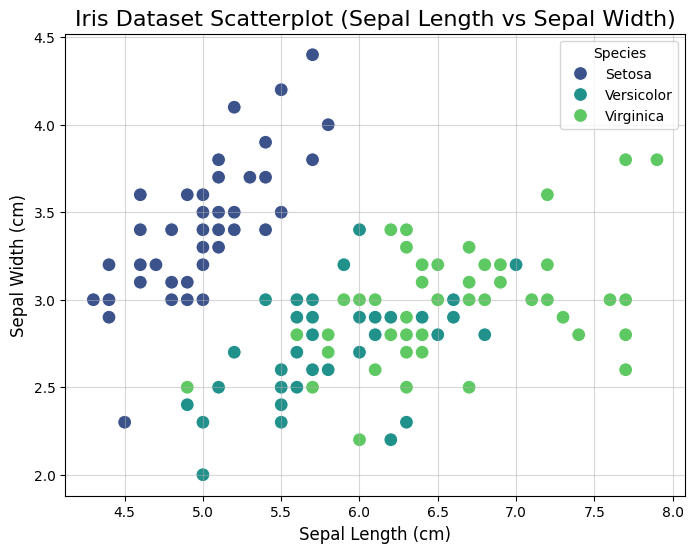

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=iris.feature_names[0], y=iris.feature_names[1], hue='species', palette='viridis', s=100)

plt.title("Iris Dataset Scatterplot (Sepal Length vs Sepal Width)", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)
plt.legend(title="Species", fontsize=10)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_values = np.exp(x - np.max(x))
    return exp_values / np.sum(exp_values)

class MulticlassPerceptron:
    def __init__(self, input_dim, output_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.zeros(output_dim)
        self.learning_rate = learning_rate

    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        linear_output = self.forward(X)
        return np.argmax(softmax(linear_output), axis=1)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            for i in range(X.shape[0]):
                linear_output = self.forward(X[i])
                y_pred = softmax(linear_output)
                
                error = np.zeros_like(y_pred)
                error[y[i]] = 1

                dw = np.outer(X[i], error - y_pred)
                db = error - y_pred  

                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

            if (epoch + 1) % 10 == 0:
                y_pred_all = self.predict(X)
                loss = np.mean(y_pred_all != y)  
                print(f"Epoch {epoch + 1}, Accuracy: {100 - loss*100:.2f}%")

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_dim = X_train.shape[1]
output_dim = len(np.unique(y))
perceptron = MulticlassPerceptron(input_dim, output_dim, learning_rate=0.05)

perceptron.train(X_train, y_train, epochs=10)

test_predictions = perceptron.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 10, Accuracy: 60.83%
Test Accuracy: 70.00%
